## Dataset (https://www.kaggle.com/datasets/kazanova/sentiment140)

In [1]:
import numpy as np

In [2]:
import pandas as pd

data_dir = "../data_deep_learning/training.1600000.processed.noemoticon.csv"
df = pd.read_csv(data_dir, encoding="latin", header=None)

df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df = df.iloc[:, [0, 5]]
df

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df.columns = ['sentiment', 'tweet']

In [5]:
df["sentiment"].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [6]:
df["sentiment"] = df["sentiment"].replace({0: 'negatif', 4: 'positif'})

In [7]:
df.head()

,sentiment,tweet
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negatif,is upset that he can't update his Facebook by ...
2,negatif,@Kenichan I dived many times for the ball. Man...
3,negatif,my whole body feels itchy and like its on fire
4,negatif,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.sample(10)

,sentiment,tweet
78101,negatif,@JeepersMedia I am sorry to hear that you got ...
352972,negatif,600 words to go! stomach is still rumbling awa...
1149520,positif,@Hollywoodheat thanks. i dont know what to do...
172159,negatif,Going to the airport
1284508,positif,@eggboxrobin understandable. I just wondered ...
172369,negatif,wtf come i need this day to go by
837052,positif,@sunsetboba ahh. but you still get to go have...
321216,negatif,still trying to figure this thing out.... bore...
829677,positif,"@MmmBaileys Oh yes definitely, I want to marry..."
1488946,positif,chinese restaurant uesterday night...mmh gnam ...


### Preprocessing

In [9]:
import re
import nltk  
# nltk.dowload('stopwords')

In [10]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [11]:
english_stopwords = stopwords.words('english')
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
stemmer = SnowballStemmer('english')

In [13]:
def preproces(text):
    
    # Les mentions, les liens et tout ce qui n'est pas alphanumérique
    
    regex_text = "@\S+|https?:\S+|http?:\S+|[^A-ZAa-z0-9]+" # Tout ce qui commence par @ et n'est pas suivi d'espace, tout ce qui commence pas https ou http(si ça existe), tout ce qui n'est pas du texte(emoji)
    text = re.sub(regex_text, " ", str(text).lower().strip())
    
    # Stopwords &
    # Stemming: Remplacer chaque mots par son radical. Exple: mangeons, mangez, manges seront remplacés par mange 
    
    words = text.split(" ")
    phrase_nettoye = []

    for word in words:
        if word not in english_stopwords:
            word_stem = stemmer.stem(word)
            phrase_nettoye.append(word_stem)
            
    cleaned_text = " ".join(phrase_nettoye).strip()
    
    return cleaned_text

In [14]:
preproces("@BigAdekad Hello, I was wondering when your course on deep learning would be available")

'hello wonder cours deep learn would avail'

In [15]:
df['text'] = df['tweet'].apply(preproces)

In [16]:
df.head()

,sentiment,tweet,text
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,negatif,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,negatif,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save 50 rest go bound
3,negatif,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,negatif,"@nationwideclass no, it's not behaving at all....",behav mad see


### Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df['sentiment'], random_state=42)

In [19]:
len(train_data), len(test_data)

(1280000, 320000)

In [20]:
test_data['sentiment'].value_counts()

negatif    160000
positif    160000
Name: sentiment, dtype: int64

In [21]:
def length(text):
    return len(text.split(" "))

In [22]:
df['len'] = df['text'].apply(length)

In [23]:
df['len'].min(), df['len'].max(), df['len'].mean(), df['len'].median()

(1, 50, 7.22946, 7.0)

In [24]:
df['len'].describe()

count    1.600000e+06
mean     7.229460e+00
std      4.053380e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      5.000000e+01
Name: len, dtype: float64

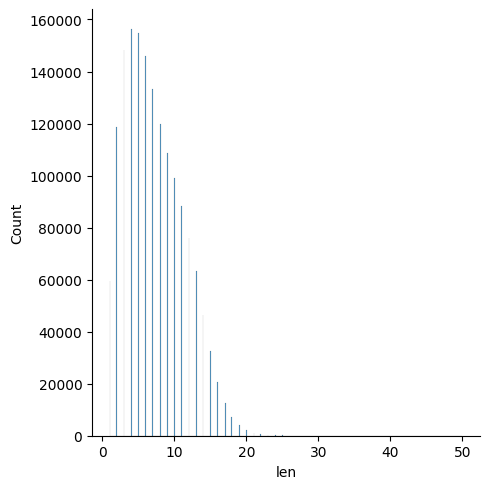

In [25]:
import seaborn as sns
sns.displot(df['len'])

### Tokenization

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-02-05 23:50:00.724641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 23:50:06.075500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-05 23:50:06.075579: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-02-05 23:50:19.733194: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [27]:
vocab_size = 70000
maxlen = 15
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index

# Train
training_sentences = tokenizer.texts_to_sequences(train_data['text']) # Passer de phrase à une séquence
training_padd = pad_sequences(training_sentences, 
              padding="post", 
              maxlen=maxlen,
             truncating="post")

# Test
test_sentences = tokenizer.texts_to_sequences(test_data['text'])
test_padd = pad_sequences(test_sentences, 
              padding="post", 
              maxlen=maxlen,
             truncating="post")

In [28]:
training_padd

array([[  13,    3,  297, ...,  902,    0,    0],
       [ 578,  333,  149, ...,    0,    0,    0],
       [  49,  418,   21, ...,    0,    0,    0],
       ...,
       [  48,   12,   36, ...,    0,    0,    0],
       [ 447,   33,  564, ..., 3814,  277,  385],
       [ 212,   28,  774, ...,    0,    0,    0]], dtype=int32)

### Label Encoder

In [29]:
train_data['sentiment']

1036873    positif
287781     negatif
333391     negatif
1484559    positif
562778     negatif
            ...   
1592199    positif
880070     positif
1093760    positif
502113     negatif
1421597    positif
Name: sentiment, Length: 1280000, dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()
training_labels = encoder.fit_transform(train_data['sentiment'])
test_labels = encoder.fit_transform(test_data['sentiment'])

In [32]:
training_labels

array([1, 0, 0, ..., 1, 0, 1])

In [33]:
training_labels.shape

(1280000,)

In [34]:
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [35]:
training_labels.shape

(1280000, 1)

### Modeling

In [36]:
import tensorflow as tf

In [37]:
np.power(vocab_size, 1/4)

16.26576561697786

In [84]:
embedding_dim = 16

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Attribuer 16 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.GlobalAveragePooling1D(), # La moyenne pour chaque phrase
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model_RNN.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=2,
                                        restore_best_weights=True
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

h = model.fit(training_padd, training_labels, epochs=50, batch_size=1024, # batch size pour réduire le nombre de parametre à entrainer
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50


2024-02-04 18:52:02.903162: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 76800000 exceeds 10% of free system memory.


 142/1250 [==>...........................] - ETA: 25s - loss: 0.6729 - accuracy: 0.6152

KeyboardInterrupt: 

In [37]:
import matplotlib.pyplot as plt

def plot_grah(history, string):    
    plt.plot((history.history[string]))
    plt.plot((history.history["val_" + string]))    
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.title("Learning Curve")
    plt.show()

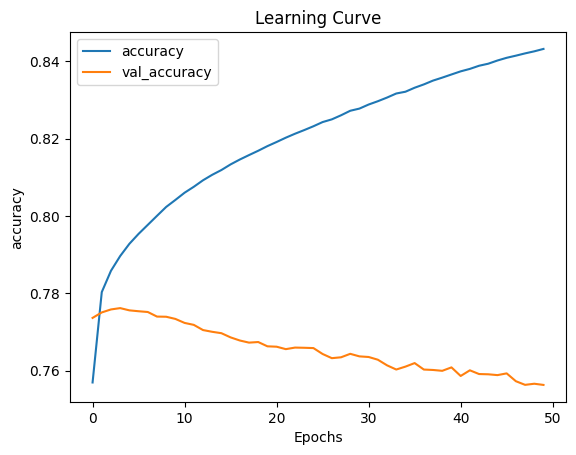

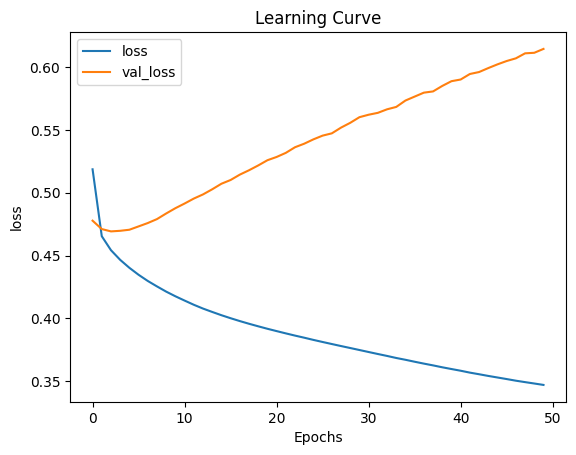

In [83]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')


### Recurrent Neural Network

In [85]:
# Ou Looping Neural Network (un peu comme utilisé les mots précédents pour prédire le mots suivants)(Suite de Fibonacci)
# Utiliser les mots précédent pour garder le contexte de la phrase


# Le problème

# phrase1 = "J'étais content, maintenant je suis énervé" sentiment négatif
# phrase2 = "J'étais énervé, maintenant je suis content" sentiment positif

# Avec l'ancienne maniére de faire(GlobalAveragePooling1D) ces 2 phrases auraient le même sentiment(vu qu'on a le même nombre de mots et les mêmes mots)
# Par contre le problème des RNN c'est que leur mémoire est très courte

In [91]:
embedding_dim = 16

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Attribuer 16 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.SimpleRNN(10),
        # tf.keras.layers.SimpleRNN(10, return_sequences=True), # À voir
        # tf.keras.layers.SimpleRNN(10, return_sequences=True),
        # tf.keras.layers.SimpleRNN(10),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model_RNN.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)
 
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=2,
                                        restore_best_weights=True
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          1120000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                270       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,120,367
Trainable params: 1,120,367
Non-trainable params: 0
_________________________________________________________________


In [89]:

h = model.fit(training_padd, training_labels, epochs=50, batch_size=1024, # batch size pour réduire le nombre de parametre à entrainer
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50


2024-02-04 18:54:28.154895: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 76800000 exceeds 10% of free system memory.


1250/1250 [==============================] - 38s 29ms/step - loss: 0.5313 - accuracy: 0.7362 - val_loss: 0.4869 - val_accuracy: 0.7705
Epoch 2/50
1250/1250 [==============================] - 34s 27ms/step - loss: 0.4644 - accuracy: 0.7840 - val_loss: 0.4775 - val_accuracy: 0.7728
Epoch 3/50
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4423 - accuracy: 0.7968 - val_loss: 0.4778 - val_accuracy: 0.7728
Epoch 4/50
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4255 - accuracy: 0.8067 - val_loss: 0.4822 - val_accuracy: 0.7713
Epoch 5/50
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4116 - accuracy: 0.8156 - val_loss: 0.4883 - val_accuracy: 0.7684
Epoch 6/50
1250/1250 [==============================] - 33s 27ms/step - loss: 0.3999 - accuracy: 0.8219 - val_loss: 0.4977 - val_accuracy: 0.7667
Epoch 7/50
1250/1250 [==============================] - 33s 26ms/step - loss: 0.3904 - accuracy: 0.8279 - val_loss: 0.5060 - val_accura

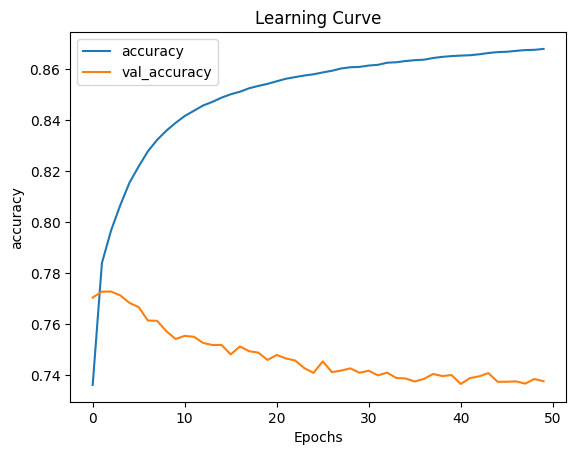

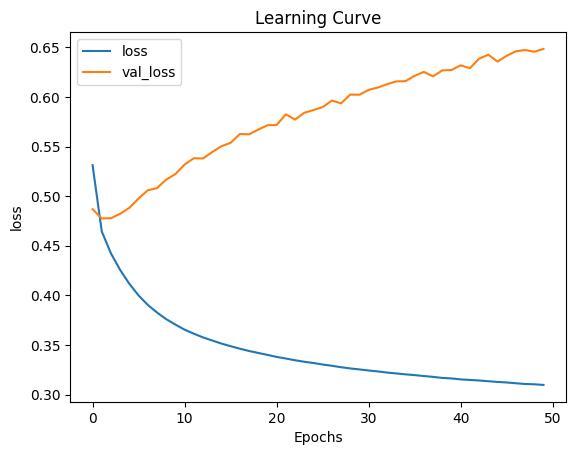

In [90]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')


### LSTM(Long Short Term Memory)

In [ ]:
# Cell State Memory(La mémoire qui va garder les précédent mots) et Input Gate(aurra une sortie entre 0 et 1)
# Tous les gates sont des neurones auxquels ont applique un sigmoid
# Le IG décide de quelle partie de l'entrée(les précédents mots) sera sauvegardé dans la mémoire
# Le Forget Gate décide de ce qu'il faut oublier de la mémoire
# Output Gate qui décide de quelle partie de la mémoire est envoyée à la prochaine étape(mot suivant)

# Bidirectionnel des LSTM(c'est à dire lire la phrase dans l'autre sens)

In [92]:
embedding_dim = 16

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),  # Attribuer 16 poids(caractéristiques(nombres)) à chacun des 20000 mots
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.25)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)), # La dernière couche n'a pas besoin de return sequence
        # tf.keras.layers.LSTM(10, return_sequences=True), # À voir
        # tf.keras.layers.LSTM(10, return_sequences=True),
        # tf.keras.layers.LSTM(10, return_sequences=True),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model_RNN.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)
 
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=2,
                                        restore_best_weights=True
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          1120000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 32)         4224      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,130,769
Trainable params: 1,130,769
No

In [ ]:
h = model.fit(training_padd, training_labels, epochs=50, batch_size=1024, # batch size pour réduire le nombre de parametre à entrainer
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50


2024-02-04 19:27:15.637789: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 76800000 exceeds 10% of free system memory.


1250/1250 [==============================] - 143s 106ms/step - loss: 0.4863 - accuracy: 0.7625 - val_loss: 0.4640 - val_accuracy: 0.7782
Epoch 2/50
1250/1250 [==============================] - 137s 109ms/step - loss: 0.4478 - accuracy: 0.7876 - val_loss: 0.4640 - val_accuracy: 0.7783
Epoch 3/50
1191/1250 [===========================>..] - ETA: 5s - loss: 0.4337 - accuracy: 0.7946

In [ ]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')


### Modifier l'Architecture

### Transfert Learning

In [38]:
# Télécharger le glove twitter 27B
glove_file = "../data_deep_learning/glove.twitter.27B.50d.txt"

raw_df = pd.read_csv(glove_file, sep="\s+", skiprows=1, header=None)

In [46]:
raw_df_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,<user>,0.787040,0.72151,0.291480,-0.056527,0.316830,0.47172,0.023461,0.69568,0.207820,...,-2.216200,-0.42537,0.461570,0.886260,-0.220140,0.025599,-0.38615,0.080107,-0.075323,-0.614610
1,.,0.686610,-1.07720,0.011114,-0.240750,-0.342200,0.64456,0.549570,0.30411,-0.546820,...,-1.349500,0.23258,0.253830,-0.102260,0.658240,0.160150,0.20959,-0.067516,-0.519520,-0.349220
2,:,0.984830,0.19784,0.284030,0.354060,0.243800,0.42519,-0.050784,0.48965,0.182310,...,-2.882000,-0.30393,0.047981,1.093700,0.418400,-0.689580,-0.45923,0.233680,-0.306280,-0.093607
3,rt,0.682430,0.73589,0.017529,-0.137630,0.360290,0.51704,0.195400,0.75219,0.430290,...,-2.749000,-0.55106,0.040409,0.291640,-0.287920,-0.022740,-0.40295,0.147710,0.080503,-0.681150
4,",",0.137440,-1.01510,-0.504910,0.269830,-0.755710,1.10140,0.077018,-0.15144,0.061658,...,-2.093400,0.60543,-0.337260,0.193130,-0.042527,-0.190120,-0.23469,0.212590,-0.194240,-0.938320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977180,ﾊﾞｲﾊﾞｰｲ,-1.737700,-0.58815,-1.431900,-0.247300,-1.066100,0.53406,0.213710,0.86891,-0.886290,...,1.115400,-1.69900,0.568190,-0.075272,-2.044400,0.598860,-0.17589,-0.893910,-0.001309,-0.275290
977181,ﾊﾟﾝﾁ,-0.054336,-0.48003,-2.238000,-0.766570,0.489700,0.14818,0.603240,-0.70208,-1.024900,...,2.133600,0.81577,0.149620,0.954920,-0.259360,1.445300,0.18633,-0.153720,0.182190,-1.145100
977182,ﾔﾒﾀﾏｴ,0.842870,0.36278,-1.769500,1.001100,-0.035064,0.51417,-1.591800,0.85464,1.044100,...,3.028800,1.27140,-2.137900,-0.119950,-1.555300,-0.170960,-0.30855,-0.245730,0.633240,-0.803040
977183,ﾖｲｼｮｯ,0.828530,-1.49660,-0.331630,-1.724800,0.753640,-0.66916,0.216310,0.54184,-0.183420,...,2.773500,0.20257,0.074379,-0.020002,-1.013300,0.568820,-0.17648,0.372900,0.769530,1.439400


In [39]:
glove_embeddings = {}

In [40]:
with open(glove_file) as f:
    rows = f.readlines()[1:]
    for line in rows:  
        values = line.split(" ")
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector

In [41]:
glove_embeddings['the']

array([ 2.5320e-01, -1.4884e-02,  5.9371e-01,  1.5902e-01,  1.2754e-01,
        2.2428e-01,  8.9421e-01,  3.6396e-01, -3.1339e-01, -5.1857e-01,
        2.9637e-01, -4.1098e-02, -6.4555e+00,  3.2260e-01,  3.7280e-01,
       -6.1690e-01,  4.6744e-01,  5.0600e-01,  3.1950e-02,  1.0155e-01,
       -1.9615e-01,  1.3364e-01, -2.7140e-01, -4.1728e-01,  7.7940e-03,
        1.3573e-01, -7.2992e-02,  2.5208e-01,  5.1148e-01,  1.5120e-01,
        8.4398e-02, -2.4791e-01, -1.5913e-01,  1.5005e-01,  7.7243e-01,
        3.6632e-01, -9.8310e-02, -6.4317e-02, -7.1983e-04, -1.5231e-01,
       -1.4604e+00, -3.1696e-01, -4.1762e-01,  7.3363e-02,  3.2043e-01,
        3.4324e-01,  1.0895e-02, -2.8932e-01,  4.5493e-01,  1.8659e-01],
      dtype=float32)

In [42]:
len(glove_embeddings)

1193514

In [43]:
words = word_index.keys()

In [44]:
words

dict_keys(['<OOV>', 'go', 'get', 'day', 'good', 'work', 'like', 'love', 'quot', 'today', 'time', 'got', 'lol', 'thank', 'want', 'back', 'one', 'miss', 'u', 'know', 'see', 'think', 'feel', 'im', 'realli', 'amp', 'night', 'hope', 'still', 'watch', 'need', 'make', '2', 'well', 'new', 'home', 'look', 'oh', 'come', 'much', 'last', 'twitter', 'morn', 'tomorrow', 'great', 'wish', 'wait', '3', 'sad', 'sleep', 'haha', 'bad', 'fun', 'week', 'tri', 'right', 'follow', 'happi', 'would', 'friend', 'thing', 'sorri', 'tonight', 'say', 'way', 'take', 'nice', 'though', 'gonna', 'better', 'hate', 'even', 'yeah', 'bed', 'tweet', 'could', 'start', 'school', 'peopl', 'show', 'hour', 'guy', 'play', 'weekend', 'hey', 'final', 'next', '4', 'yes', 'awesom', 'let', 'lt', 'use', 'dont', 'never', 'soon', 'cant', 'tire', 'long', 'rain', 'pleas', 'littl', 'year', 'first', 'everyon', 'wanna', 'best', 'movi', 'sick', 'life', 'ok', 'find', 'girl', 'call', 'suck', 'sure', 'done', 'bore', 'help', 'head', '1', 'x', 'alway

In [45]:
i = 0
# Voir le nombre de mot de notre vocab sont présent dans le glove_embedding
for word in words:
    if glove_embeddings.get(word) is not None:
        i = i + 1 
print(i)

79006


In [46]:
len(words)

248676

In [47]:
matrix_emb = np.zeros((vocab_size, 50))

In [48]:
matrix_emb.shape

(70000, 50)

In [49]:
matrix_emb[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
for word, i in word_index.items():
    if i > vocab_size - 1:
        break
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        matrix_emb = embedding_vector
    break

In [51]:
glove_embeddings['fgsgfg']

KeyError: 'fgsgfg'

In [52]:
glove_embeddings.get('fgsgfg')

In [53]:
matrix_emb[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
embedding_dim = 50

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[matrix_emb], trainable=False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.25)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)), 
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    ]
)

model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model_RNN.h5", 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)
 
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=2,
                                        restore_best_weights=True
                                       ) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


2024-02-05 23:55:30.426354: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-05 23:55:30.429424: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-05 23:55:30.429514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elimson-HP-250-G7-Notebook-PC): /proc/driver/nvidia/version does not exist
2024-02-05 23:55:30.450152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
h = model.fit(training_padd, training_labels, epochs=50, batch_size=1024, # batch size pour réduire le nombre de parametre à entrainer
              validation_data=(test_padd, test_labels),
             callbacks=[model_ckp])

Epoch 1/50


2024-02-05 23:34:09.184246: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 76800000 exceeds 10% of free system memory.


1250/1250 [==============================] - 135s 101ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
 359/1250 [=======>......................] - ETA: 1:19 - loss: 0.6932 - accuracy: 0.5000

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          3500000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 32)         8576      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,514,881
Trainable params: 14,881
Non-trainable params: 3,500,000
_________________________________________________________________


In [ ]:
plot_grah(h, 'accuracy')
plot_grah(h, 'loss')
